In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
train = pd.read_csv("dataset.csv")
test =pd.read_csv("New passengers.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
##statistical Info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
##data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
nul=train.isnull().sum()
nul[nul>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

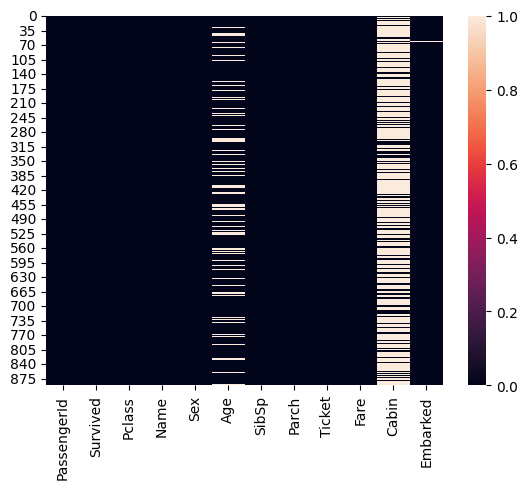

In [10]:
sns.heatmap(train.isnull())

In [11]:
def clean(d):
    
     d.drop(['Cabin','Name','Ticket','Embarked'],axis=1,inplace=True) 
     d.Age=train.Age.fillna(train.Age.mean())
     d.Fare=train.Fare.fillna(train.Fare.mean())
     d.dropna()
     return d

In [12]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.000000,1,0,7.2500
1,2,1,1,female,38.000000,1,0,71.2833
2,3,1,3,female,26.000000,0,0,7.9250
3,4,1,1,female,35.000000,1,0,53.1000
4,5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000
887,888,1,1,female,19.000000,0,0,30.0000
888,889,0,3,female,29.699118,1,2,23.4500
889,890,1,1,male,26.000000,0,0,30.0000


In [13]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,22.000000,0,0,7.2500
1,893,3,female,38.000000,1,0,71.2833
2,894,2,male,26.000000,0,0,7.9250
3,895,3,male,35.000000,0,0,53.1000
4,896,3,female,35.000000,1,1,8.0500
...,...,...,...,...,...,...,...
413,1305,3,male,29.699118,0,0,0.0000
414,1306,1,female,44.000000,0,0,7.9250
415,1307,3,male,29.699118,0,0,8.0500
416,1308,3,male,34.000000,0,0,32.5000


<Axes: >

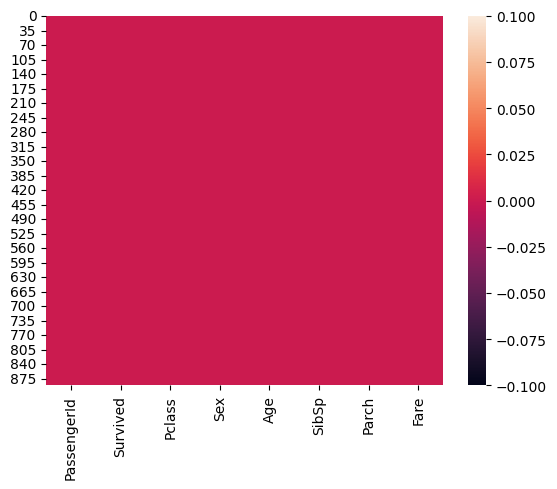

In [14]:
sns.heatmap(train.isnull())


Data Analysis

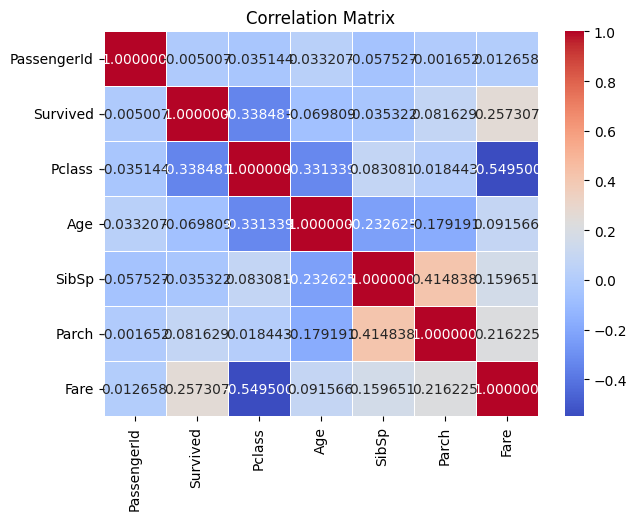

In [15]:
numeric_train = train.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_train.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="1f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

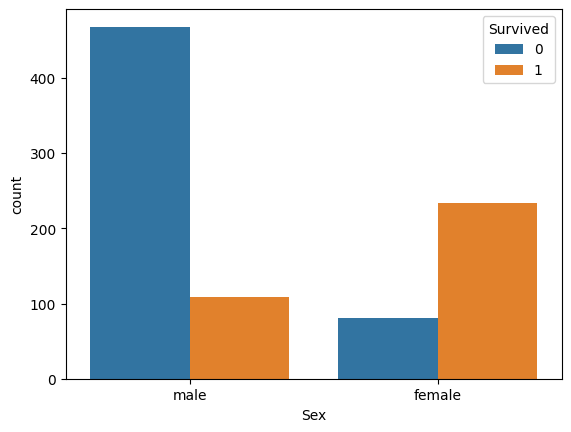

In [18]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

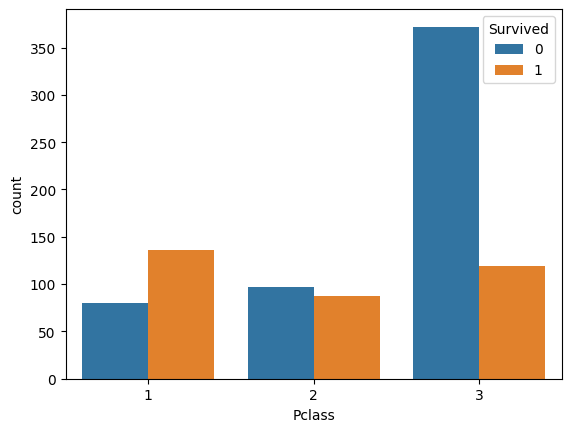

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

Transform data

In [20]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train['Sex'] = train['Sex'].replace({'male': 1, 'female': 0})


In [21]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [22]:
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].replace({'male': 1, 'female': 0})
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,22.000000,0,0,7.2500
1,893,3,0,38.000000,1,0,71.2833
2,894,2,1,26.000000,0,0,7.9250
3,895,3,1,35.000000,0,0,53.1000
4,896,3,0,35.000000,1,1,8.0500
...,...,...,...,...,...,...,...
413,1305,3,1,29.699118,0,0,0.0000
414,1306,1,0,44.000000,0,0,7.9250
415,1307,3,1,29.699118,0,0,8.0500
416,1308,3,1,34.000000,0,0,32.5000


create model

In [23]:
x=train.drop(['Survived'],axis=1)
y=train.Survived

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [25]:
accuracies=[]

In [26]:
def all(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)  
    accuracy = accuracy_score(pre, y_test)
    print('Accuracy=', accuracy)
    accuracies.append(accuracy)

    

In [27]:
model1=LogisticRegression()
all(model1)

Accuracy= 0.7877094972067039


c:\Users\Manager\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
model2=RandomForestClassifier()
all(model2)

Accuracy= 0.8603351955307262


In [29]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy= 0.8547486033519553


In [30]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy= 0.776536312849162


In [31]:
model5=KNeighborsClassifier()
all(model5)

Accuracy= 0.6145251396648045


In [32]:
model6=GaussianNB()
all(model6)

Accuracy= 0.8044692737430168


In [33]:
model7=SVC()
all(model7)

Accuracy= 0.6536312849162011


In [34]:
Algorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [35]:
new=pd.DataFrame({'Algorithms':Algorithms,'accuracies':accuracies})
new

,Algorithms,accuracies
0,LogisticRegression,0.787709
1,RandomForestClassifier,0.860335
2,GradientBoostingClassifier,0.854749
3,DecisionTreeClassifier,0.776536
4,KNeighborsClassifier,0.614525
5,GaussianNB,0.804469
6,SVC,0.653631


In [36]:
modelx=RandomForestClassifier()
modelx.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
lpre=modelx.predict(test)

In [38]:
final=test.PassengerId

In [39]:
new_dataframe=pd.DataFrame({'PassengerId':final,'Survived':lpre})

In [40]:
new_dataframe

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
new_dataframe.to_csv('prediction.csv')